*Note: This code was a team effort by Group 1.*

# **Mutlilevel Analysis**

In order to perform a multilevel analysis, the Pymer4 tool has been used, as proposed by Jolly (2018).

Reference:
Jolly, (2018). Pymer4: Connecting R and Python for Linear Mixed Modeling. Journal of Open Source Software, 3(31), 862, https://doi.org/10.21105/joss.00862

In [198]:
# import some basic libraries
import os
import pandas as pd

os.environ["R_HOME"] = "/Library/Frameworks/R.framework/Resources"

## **1. Preparing the data**

### 1.1 Combining all the new features and adding them to the original dataset

In [199]:
# Reading the main dataset that was created for our project
original_df = pd.read_csv('combined_themepark_dataset.csv')

# Reading the csv files that have been exported from the different hypotheses testing processes, including the new engineered features

H1_data = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/02_new%20dataframes/H1_dataframe.csv')
H2_data = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/02_new%20dataframes/H2_dataframe.csv')
H3_data = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/02_new%20dataframes/H3_dataframe.csv')
H4_data = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/02_new%20dataframes/H4_dataframe.csv')

In [200]:
original_df

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66
1,12/31/23 8:01 PM,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,NaN,4.170000e+11,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,100000
2,12/31/23 7:30 PM,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,NaN,2.850000e+11,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,100000
3,12/31/23 7:00 PM,disneyland paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,NaN,1.360000e+11,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,5200000
4,12/31/23 7:00 PM,silverwood theme park,It's the last day of our New Year's Sale! Save...,17,2,0,2,NaN,4.960000e+11,16,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,381000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15438,01/01/2023 02:00,wild adventures theme park,LAST CHANCE! \n\nPrices on 2023 Season Passes ...,20,1,0,2,NaN,1.250000e+11,20,NaN,1.0,NaN,84679583132,84679583132_10159284713193133,https://www.facebook.com/WildAdventures/photos...,66
15439,01/01/2023 01:20,playland,O Grupo Playcenter e os Parques Playcenter Fam...,7,1,0,1,NaN,2.460000e+09,7,NaN,1.0,NaN,"1,70866E+14",170865866397863_2401446080006486,https://www.facebook.com/170865866397863/posts...,23000
15440,01/01/2023 00:01,disneyland paris,Gelukkig 2023! Laat de magie dit jaar stralen ...,833,40,31,44,NaN,1.750000e+12,621,NaN,NaN,1.0,"6,52389E+14",652389081615295_2176203019233886,https://www.facebook.com/652389081615295/posts...,5200000
15441,01/01/2023 00:00,six flags over georgia & hurricane harbor,What are your 2023 New Years resolutions? ✨\n\...,58,7,2,9,NaN,1.420000e+12,49,NaN,1.0,NaN,34284255238,34284255238_10160187479800239,https://www.facebook.com/sixflagsovergeorgia/p...,479000


In [201]:
# Merge the required columns from H2_data to original_df based on 'post_id'
original_df = pd.merge(original_df, H2_data[['post_id', 'post_type']], on='post_id', how='left')

# Display the first few rows of the merged DataFrame
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,post_type
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,1


In [202]:
# Merge the required columns from H4_data to original_df based on 'post_id'
original_df = pd.merge(original_df, H4_data[['post_id', 'has_emoji']], on='post_id', how='left')

# Display the first few rows of the merged DataFrame
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,post_type,has_emoji
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,1,1


In [203]:
# Merging the required columns from H3_data to original_df based on 'post_id'
original_df = pd.merge(original_df, H3_data[['post_id', 'sentiment']], on='post_id', how='left')

# Display the first few rows of the merged DataFrame
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,post_type,has_emoji,sentiment
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,1,1,positive


In [204]:
H1_data

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,day_of_week,time_of_day
0,2023-12-31 15:40:00,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,Sunday,Afternoon
1,2023-12-31 14:01:00,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,NaN,4.170000e+11,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,100000,Sunday,Afternoon
2,2023-12-31 13:30:00,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,NaN,2.850000e+11,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,100000,Sunday,Afternoon
3,2023-12-31 19:00:00,disneyland paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,NaN,1.360000e+11,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,5200000,Sunday,Evening
4,2023-12-31 10:00:00,silverwood theme park,It's the last day of our New Year's Sale! Save...,17,2,0,2,NaN,4.960000e+11,16,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,381000,Sunday,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15438,2022-12-31 20:00:00,wild adventures theme park,LAST CHANCE! \n\nPrices on 2023 Season Passes ...,20,1,0,2,NaN,1.250000e+11,20,NaN,1.0,NaN,84679583132,84679583132_10159284713193133,https://www.facebook.com/WildAdventures/photos...,66,Saturday,Evening
15439,2022-12-31 19:20:00,playland,O Grupo Playcenter e os Parques Playcenter Fam...,7,1,0,1,NaN,2.460000e+09,7,NaN,1.0,NaN,"1,70866E+14",170865866397863_2401446080006486,https://www.facebook.com/170865866397863/posts...,23000,Saturday,Evening
15440,2023-01-01 00:01:00,disneyland paris,Gelukkig 2023! Laat de magie dit jaar stralen ...,833,40,31,44,NaN,1.750000e+12,621,NaN,NaN,1.0,"6,52389E+14",652389081615295_2176203019233886,https://www.facebook.com/652389081615295/posts...,5200000,Sunday,Morning
15441,2022-12-31 18:00:00,six flags over georgia & hurricane harbor,What are your 2023 New Years resolutions? ✨\n\...,58,7,2,9,NaN,1.420000e+12,49,NaN,1.0,NaN,34284255238,34284255238_10160187479800239,https://www.facebook.com/sixflagsovergeorgia/p...,479000,Saturday,Evening


In [205]:
H1_data.head(4)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,day_of_week,time_of_day
0,2023-12-31 15:40:00,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,Sunday,Afternoon
1,2023-12-31 14:01:00,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,NaN,4.170000e+11,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,100000,Sunday,Afternoon
2,2023-12-31 13:30:00,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,NaN,2.850000e+11,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,100000,Sunday,Afternoon
3,2023-12-31 19:00:00,disneyland paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,NaN,1.360000e+11,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,5200000,Sunday,Evening


In [206]:
# Merging the required columns from H1_data to original_df based on 'post_id'
original_df = pd.merge(original_df, H1_data[['post_id', 'time_of_day']], on='post_id', how='left')

# Display the first few rows of the merged DataFrame
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,...,picture_posts,video_posts,profile_id,post_id,link,followers,post_type,has_emoji,sentiment,time_of_day
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,...,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,1,1,positive,Afternoon


In [207]:
# Merging the required columns from H1_data to original_df based on 'post_id'
original_df = pd.merge(original_df, H1_data[['post_id', 'day_of_week']], on='post_id', how='left')

# Display the first few rows of the merged DataFrame
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,...,video_posts,profile_id,post_id,link,followers,post_type,has_emoji,sentiment,time_of_day,day_of_week
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,...,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,1,1,positive,Afternoon,Sunday


### Checking, if the final combined dataframe looks fine

In [208]:
original_df

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,...,video_posts,profile_id,post_id,link,followers,post_type,has_emoji,sentiment,time_of_day,day_of_week
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,...,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,1,1,positive,Afternoon,Sunday
1,12/31/23 8:01 PM,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,NaN,4.170000e+11,33,...,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,100000,3,1,positive,Afternoon,Sunday
2,12/31/23 7:30 PM,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,NaN,2.850000e+11,21,...,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,100000,2,1,positive,Afternoon,Sunday
3,12/31/23 7:00 PM,disneyland paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,NaN,1.360000e+11,478,...,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,5200000,1,1,neutral,Evening,Sunday
4,12/31/23 7:00 PM,silverwood theme park,It's the last day of our New Year's Sale! Save...,17,2,0,2,NaN,4.960000e+11,16,...,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,381000,2,0,positive,Morning,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21328,01/01/2023 02:00,wild adventures theme park,LAST CHANCE! \n\nPrices on 2023 Season Passes ...,20,1,0,2,NaN,1.250000e+11,20,...,NaN,84679583132,84679583132_10159284713193133,https://www.facebook.com/WildAdventures/photos...,66,1,0,positive,Evening,Saturday
21329,01/01/2023 01:20,playland,O Grupo Playcenter e os Parques Playcenter Fam...,7,1,0,1,NaN,2.460000e+09,7,...,NaN,"1,70866E+14",170865866397863_2401446080006486,https://www.facebook.com/170865866397863/posts...,23000,1,1,neutral,Evening,Saturday
21330,01/01/2023 00:01,disneyland paris,Gelukkig 2023! Laat de magie dit jaar stralen ...,833,40,31,44,NaN,1.750000e+12,621,...,1.0,"6,52389E+14",652389081615295_2176203019233886,https://www.facebook.com/652389081615295/posts...,5200000,2,1,neutral,Morning,Sunday
21331,01/01/2023 00:00,six flags over georgia & hurricane harbor,What are your 2023 New Years resolutions? ✨\n\...,58,7,2,9,NaN,1.420000e+12,49,...,NaN,34284255238,34284255238_10160187479800239,https://www.facebook.com/sixflagsovergeorgia/p...,479000,1,1,positive,Evening,Saturday


# **2. Creating a multi-level model**

### 2.1 Setting up the model with the features from the hypotheses of this project

In [209]:
from pymer4.models import Lmer

# Define the formula for the multilevel regression model
formula = 'engagement ~ post_type + has_emoji + sentiment + day_of_week + time_of_day + (1|followers)'

# Create an instance of the Lmer model
model = Lmer(formula, data=original_df)

# Fit the model to the data
model.fit()

# Print a summary of the fitted model
print(model.summary())

Linear mixed model fit by REML [’lmerMod’]
Formula: engagement~post_type+has_emoji+sentiment+day_of_week+time_of_day+(1|followers)

Family: gaussian	 Inference: parametric

Number of observations: 21333	 Groups: {'followers': 53.0}

Log-likelihood: -620917.404 	 AIC: 1241864.809

Random effects:

                  Name           Var           Std
followers  (Intercept)  1.327534e+23  3.643534e+11
Residual                1.143269e+24  1.069238e+12

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: engagement~post_type+has_emoji+sentiment+day_of_week+time_of_day+(1|followers)

Family: gaussian	 Inference: parametric

Number of observations: 21333	 Groups: {'followers': 53.0}

Log-likelihood: -620917.404 	 AIC: 1241864.809

Random effects:

                  Name           Var           Std
followers  (Intercept)  1.327534e+23  3.643534e+11
Residual                1.143269e+24  1.069238e+12

No random effect correlations specified

In [210]:
# Get population level coefficients
print(model.coefs)

                          Estimate        2.5_ci       97.5_ci            SE  \
(Intercept)           1.063648e+12  9.379127e+11  1.189384e+12  6.415204e+10   
post_type            -7.086277e+10 -9.510783e+10 -4.661772e+10  1.237016e+10   
has_emoji            -3.915689e+10 -7.341108e+10 -4.902699e+09  1.747695e+10   
sentimentneutral     -2.007369e+11 -2.686696e+11 -1.328042e+11  3.466018e+10   
sentimentpositive    -1.226684e+11 -1.843566e+11 -6.098017e+10  3.147415e+10   
day_of_weekMonday    -1.216208e+11 -1.751397e+11 -6.810194e+10  2.730604e+10   
day_of_weekSaturday  -1.529579e+10 -6.422530e+10  3.363371e+10  2.496449e+10   
day_of_weekSunday    -2.104812e+10 -8.047997e+10  3.838373e+10  3.032293e+10   
day_of_weekThursday  -2.332517e+10 -6.710242e+10  2.045208e+10  2.233574e+10   
day_of_weekTuesday   -7.548939e+10 -1.279977e+11 -2.298111e+10  2.679043e+10   
day_of_weekWednesday -7.555088e+10 -1.274239e+11 -2.367786e+10  2.646631e+10   
time_of_dayEvening    6.612261e+10  1.01

In [211]:
# Get group level coefficients (just the first 5)
# Each row here is a unique intercept and slope
# which vary because we parameterized our rfx that way above
print(model.fixef.head(5))

        (Intercept)     post_type     has_emoji  sentimentneutral  \
66     1.332337e+12 -7.086277e+10 -3.915689e+10     -2.007369e+11   
2300   1.378539e+12 -7.086277e+10 -3.915689e+10     -2.007369e+11   
4000   3.128738e+11 -7.086277e+10 -3.915689e+10     -2.007369e+11   
15000  8.985916e+11 -7.086277e+10 -3.915689e+10     -2.007369e+11   
17000  1.133277e+12 -7.086277e+10 -3.915689e+10     -2.007369e+11   

       sentimentpositive  day_of_weekMonday  day_of_weekSaturday  \
66         -1.226684e+11      -1.216208e+11        -1.529579e+10   
2300       -1.226684e+11      -1.216208e+11        -1.529579e+10   
4000       -1.226684e+11      -1.216208e+11        -1.529579e+10   
15000      -1.226684e+11      -1.216208e+11        -1.529579e+10   
17000      -1.226684e+11      -1.216208e+11        -1.529579e+10   

       day_of_weekSunday  day_of_weekThursday  day_of_weekTuesday  \
66         -2.104812e+10        -2.332517e+10       -7.548939e+10   
2300       -2.104812e+10        -2.332

In [212]:
# Get group level deviates from population level coefficients (i.e. rfx)
print(model.ranef.head(5))

       X.Intercept.
66     2.686889e+11
2300   3.148908e+11
4000  -7.507747e+11
15000 -1.650569e+11
17000  6.962900e+10


<Axes: xlabel='Estimate'>

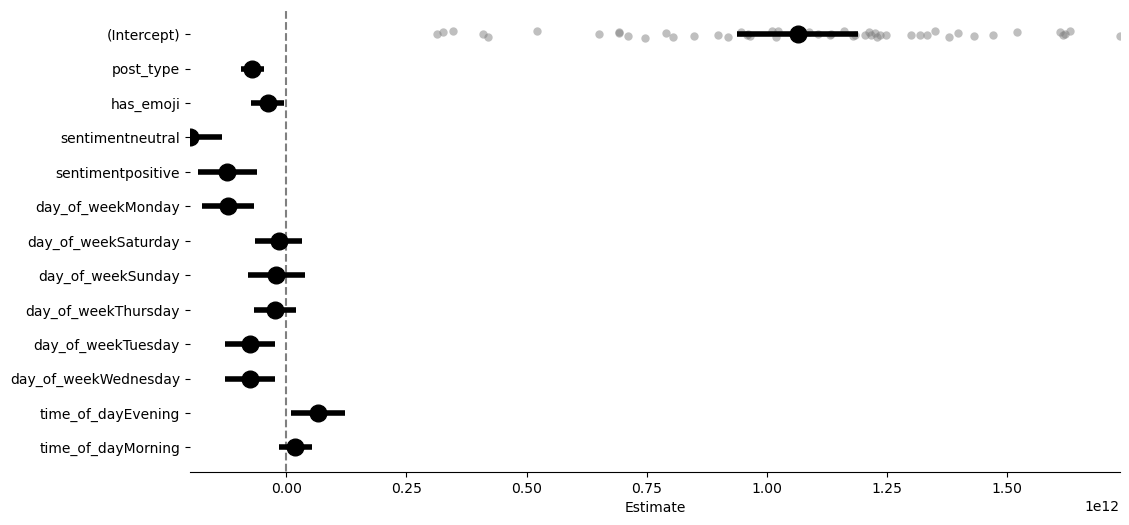

In [213]:
# Visualize coefficients with group/cluster fits overlaid ("forest plot")
model.plot_summary()

<Axes: xlabel='has_emoji', ylabel='predicted engagement'>

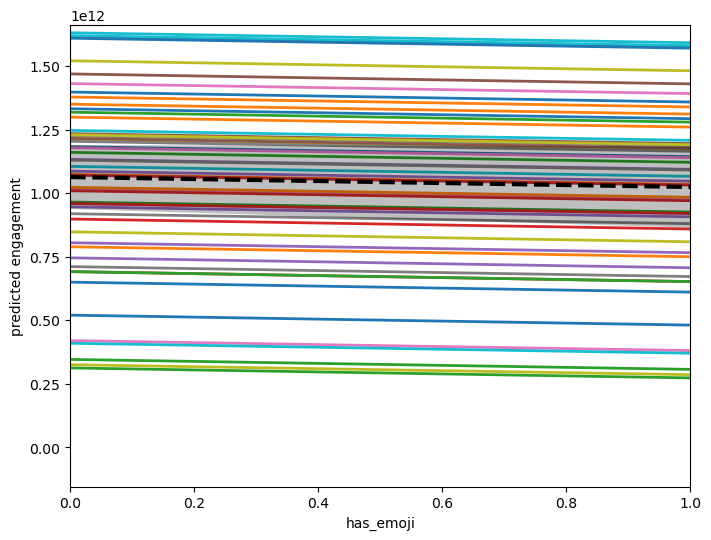

In [214]:
# Plot coefficients for each group/cluster as separate regressions
model.plot("has_emoji", plot_ci=True, ylabel="predicted engagement")

<Axes: xlabel='post_type', ylabel='predicted engagement'>

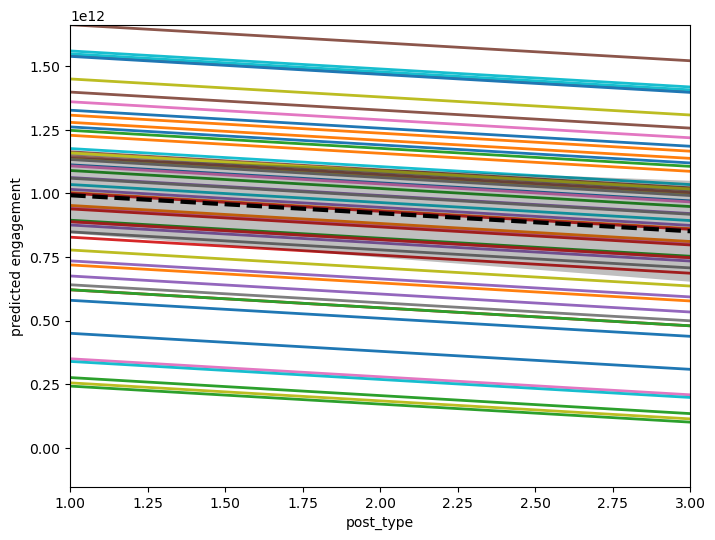

In [215]:
# Plot coefficients for each group/cluster as separate regressions
model.plot("post_type", plot_ci=True, ylabel="predicted engagement")

KeyError: 'sentiment'

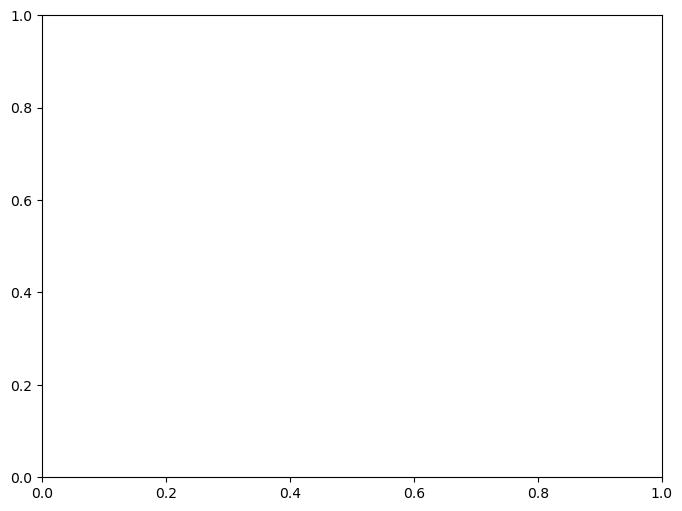

In [216]:
# Plot coefficients for each group/cluster as separate regressions
model.plot("sentiment", plot_ci=True, ylabel="predicted engagement")

### 2.2 Interpretation of results

to be done

####
